# CosmicFish PyLib: introduction and examples

This is a small iPython notebook to illustrate, with a set of examples, the use of the
CosmicFish Python Library.

Examples will be pretty basic and cover a small subset of the tools implemented in the library. To have a complete view of the structure of the library and all tools implemented you can have a look at the [documentation](index.html).

## Basic import and dependencies:

In [1]:
import numpy as np
import math
import sys
import os
import IPython

Then we get the path of the CosmicFish library and add it to the Python path:

In [2]:
cosmicfish_pylib_path = './python'
sys.path.insert(0, os.path.normpath(cosmicfish_pylib_path))

And now we can import the CosmicFish library:

In [4]:
import cosmicfish_pylib.utilities            as fu
import cosmicfish_pylib.colors               as fc
import cosmicfish_pylib.fisher_matrix        as fm
import cosmicfish_pylib.fisher_derived       as fd
import cosmicfish_pylib.fisher_operations    as fo
import cosmicfish_pylib.fisher_plot_settings as fps
import cosmicfish_pylib.fisher_plot_analysis as fpa
import cosmicfish_pylib.fisher_plot          as fp

The first thing that we might want to do, when designing an application, is printing to screen the CosmicFish header:

In [5]:
fu.CosmicFish_write_header(' Introduction and examples')


**************************************************************
   _____               _     _____     __  
  / ___/__  ___ __ _  (_)___/ __(_)__ / /  
 / /__/ _ \(_-</  ' \/ / __/ _// (_-</ _ \ 
 \___/\___/___/_/_/_/_/\__/_/ /_/___/_//_/ Py Lib
 
**************************************************************
 Introduction and examples
 This application was developed using the CosmicFish code.
**************************************************************



## Fisher matrices:

Let's start with the fisher_matrix class. This contains all the necessary tools to define and operate a Fisher matrix.
If you want the full details have a look at the fisher_matrix [documentation](cosmicfish_pylib_fisher_matrix.html).

We start by defining a matrix that we want to make a Fisher matrix:

In [6]:
matrix = [ [ 1.0, 0.0 ],
           [ 0.0, 2.0 ] ]

Now we define the parameter names for our Fisher matrix.

In [7]:
param_names = ['par1', 'par2']

Now we have all the ingredients to define a simple Fisher matrix. We can do it by just calling the fisher_matrix class constructor. This will automatically make sure that the input matrix is well behaved and is really a Fisher matrix.

In [8]:
fisher = fm.fisher_matrix( fisher_matrix=matrix, param_names=param_names )

Once we have initialized our Fisher matrix we have a set of useful operations defined on it. 

The inverse:

In [9]:
print fisher.inverse_fisher_matrix()

[[ 1.   0. ]
 [ 0.   0.5]]


The determinant:

In [10]:
print fisher.determinant()

2.0


Its eigenvalues and eigenvectors:

In [11]:
(eigenvalues,eigenvectors)=fisher.PCA()

In [12]:
print eigenvalues

[ 1.  2.]


In [13]:
print eigenvectors

[[ 1.  0.]
 [ 0.  1.]]


And errors estimate based on the specified confidence level:

In [14]:
print fisher.get_confidence_bounds( confidence_level=0.68 )
print fisher.get_confidence_bounds( confidence_level=0.95 )

[ 0.99445788  0.70318791]
[ 1.95996398  1.38590382]


We also have at our disposal some of the standard operations defined on the Fisher matrix object.

We can easily sum Fisher matrices:

In [15]:
fisher_2 = fisher
fisher_3 = fisher + fisher_2
print fisher_3.get_fisher_matrix()

[[ 2.  0.]
 [ 0.  4.]]


And check for equality/disequality:

In [16]:
print fisher_2==fisher

True


In [17]:
print fisher_3!=fisher

True


## Derived Fisher matrices:

Several tools are also included to define derived Fisher matrices. 
With this name we mean the Jacobian of the transformation that projects the Fisher matrix onto a new set 
of parameters. 
Also here we will cover the most basic usage and for the details refer to the fisher_derived [documentation](cosmicfish_pylib_fisher_derived.html).

Let's start by defining a derived Fisher matrix that takes two parameters and projects them into one:

In [18]:
derived_matrix = [[3.0],[1.0]]

We need to supply also the names of the parameters (otherwise dumb defaults will be used) to make sure that the code can
interpret well what is going on:

In [19]:
base_parameters = param_names
derived_parameters = ['par3']

Now define the derived matrix:

In [20]:
fisher_derived = fd.fisher_derived( derived_matrix=derived_matrix, 
                                    param_names=base_parameters, 
                                    derived_param_names=derived_parameters )

And use it along our base Fisher matrix:

In [21]:
new_fisher = fisher_derived.add_derived( fisher )
print new_fisher.get_fisher_matrix()

[[ 0.10526316]]


Preserving the input if we want to:

In [22]:
new_fisher = fisher_derived.add_derived( fisher, preserve_input=True )
print new_fisher.get_fisher_matrix()

** derived parameters are strongly degenerate and might alter the quality of the original Fisher matrix.
** Try removing degenerate parameters from the Fisher matrix and the derived matrix to get rid of this warning.
[[ 115708.56419416   38568.91533745  -38569.46079199]
 [  38568.91533745   12858.21420339  -12856.39602157]
 [ -38569.46079199  -12856.39602157   12856.57783976]]


Notice that the result of this operation will be a Fisher matrix with the new parameters.

## Operations on Fisher matrices:

We can also perform several operations on Fisher matrices. 
Several operations are implemented in fisher_operations. We cover here the most important and refer to the [documentation](cosmicfish_pylib_fisher_operations.html) for all the others.

We start with marginalization. If we choose a set of parameters we can marginalize over those, so that the resulting Fisher matrix does not contain them:

In [23]:
params = ['par1']
fisher_marg = fo.marginalise_over(fisher, params)
print 'Fisher matrix:', fisher_marg.get_fisher_matrix()
print 'Parameter names:', fisher_marg.get_param_names()

Fisher matrix: [[ 2.]]
Parameter names: ['par2']


Or we can marginalise over the other parameters:

In [24]:
params = ['par1']
fisher_marg = fo.marginalise(fisher, params)
print 'Fisher matrix:', fisher_marg.get_fisher_matrix()
print 'Parameter names:', fisher_marg.get_param_names()

Fisher matrix: [[ 1.]]
Parameter names: ['par1']


In some occasions we might want to restructure a Fisher matrix, reordering the parametes or eliminating some, without marginalizing. This is the goal of the reshuffle function. 

If we want to reorder parameters:

In [25]:
params = ['par2','par1']
fisher_new = fo.reshuffle(fisher, params)
print 'Fisher matrix:'
print fisher_new.get_fisher_matrix()
print 'Parameter names:', fisher_new.get_param_names()

Fisher matrix:
[[ 2.  0.]
 [ 0.  1.]]
Parameter names: ['par2', 'par1']


If we want to delete a parameter:

In [26]:
params = ['par2']
fisher_new = fo.reshuffle(fisher, params)
print 'Fisher matrix:', fisher_new.get_fisher_matrix()
print 'Parameter names:', fisher_new.get_param_names()

Fisher matrix: [[ 2.]]
Parameter names: ['par2']


Notice that the result is the same as the marginalization because in the example Fisher matrix the parameters are assumed independent. This will not be the case if parameters are correlated.

## Analysis of a set of Fisher matrices:

So far we have only considered one single Fisher matrix. In many real life applications, however, we might want to work with a set of several Fisher matrices. This is the purpose of the fisher_plot_analysis class. This handles set of Fisher matrices and has been engeneered to be extremely flexible in its usage. Here we cover its basic usage and refer the [documentation](cosmicfish_pylib_fisher_plot_analysis.html) for all the details. 

We start by defining some Fisher matrices:

In [27]:
fisher_1 = fm.fisher_matrix( [[1.0,0.0],[0.0,2.0]], param_names = ['par1','par2'] )
fisher_2 = fm.fisher_matrix( [[1.0,0.5],[0.5,2.0]], param_names = ['par1','par2'] )
fisher_3 = fm.fisher_matrix( [[0.8,0.2],[0.2,3.0]], param_names = ['par1','par3'] )

In a Fisher matrix set the name of the Fisher matrix is used as the unique identifier of the object. We want to rename all our Fisher matrices to make them different:

In [28]:
fisher_1.name = 'fisher1'
fisher_2.name = 'fisher2'
fisher_3.name = 'fisher3'

We then create an empty list of Fisher matrices:

In [29]:
fisher_list = fpa.CosmicFish_FisherAnalysis()

We then add the Fisher matrix previously defined:

In [30]:
fisher_list.add_fisher_matrix(fisher_1)
fisher_list.add_fisher_matrix([fisher_2, fisher_3])

We can now query the list to see what are the names of the Fisher matrices stored inside:

In [31]:
print 'Fisher matrices in the list:', fisher_list.get_fisher_name_list()

Fisher matrices in the list: ['fisher1', 'fisher2', 'fisher3']


Or we can directly ask for the Fisher matrices themselves:

In [32]:
print fisher_list.get_fisher_list()

[<cosmicfish_pylib.fisher_matrix.fisher_matrix instance at 0x7fb84a24d098>, <cosmicfish_pylib.fisher_matrix.fisher_matrix instance at 0x7fb84a24d128>, <cosmicfish_pylib.fisher_matrix.fisher_matrix instance at 0x7fb84a24d170>]


We can delete a Fisher matrix from the list, using its name as its identifier:

In [33]:
fisher_list.delete_fisher_matrix('fisher1')
print 'Fisher matrices in the list:', fisher_list.get_fisher_name_list()
fisher_list.add_fisher_matrix(fisher_1)

Fisher matrices in the list: ['fisher2', 'fisher3']


We can then query, for example, for all the parameters that are in the set of Fisher matrix or a sub set of it:

In [34]:
print 'Parameters in the full set:',fisher_list.get_parameter_list()
print 'Parameters in a sub set:',fisher_list.get_parameter_list(['fisher1','fisher2'])

Parameters in the full set: ['par1', 'par2', 'par3']
Parameters in a sub set: ['par1', 'par2']


Many other things are defined to handle efficiently and with extreme flexibility our set of Fisher matrices. In addition this class contains a powerfull function that will search for files containing Fisher matrices.

## Plotting:

The last main part of the library contains plot tools. The idea is that the user defines a set of Fisher matrices, as explained above, and then plots them. As before, we show here the basic usage, that might be enough for a user that just wants to get the plots, and we refer to the [documentation](cosmicfish_pylib_fisher_plot.html) of the plotting facilities and the [documentation](cosmicfish_pylib_fisher_plot_settings.html) to the plot setting module for further details.

Here we start by defining a plotter with the Fisher matrix set that we previously defined:

In [35]:
fisher_plotter = fp.CosmicFishPlotter(fishers=fisher_list)

When we initialize the plotter we can pass settings, as described in the [documentation](cosmicfish_pylib_fisher_plot_settings.html) to change the appearence of the plot. Here we just slightly change the legend format:

In [36]:
fisher_plotter = fp.CosmicFishPlotter(fishers=fisher_list,legend_ncol=3)

Notice that in the following we have to go for a rather dumb trick to avoid IPython backend messing up with figures...

### Plot 1D:

After the plotter is initialized we can produce marginalized 1D plots as follows:

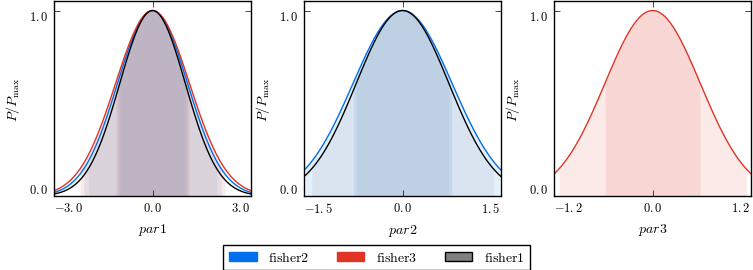

In [37]:
fisher_plotter.new_plot()
fisher_plotter.plot1D()
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 

Notice that calling the plotter without any argument will make him plot all the Fisher matrices and parameters in the set.

If we want to plot just some parameters or some Fisher matrices we can easily select them:

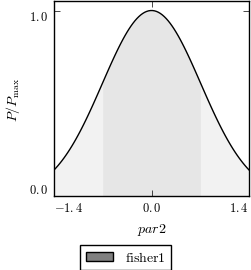

In [38]:
fisher_plotter.new_plot()
fisher_plotter.plot1D(['par2','par3'],['fisher1'])
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 

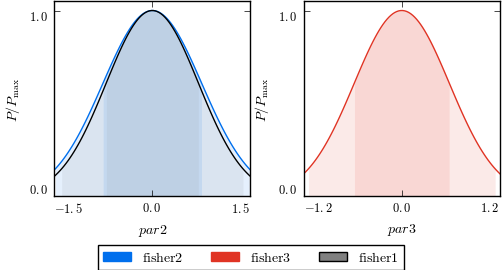

In [39]:
fisher_plotter.new_plot()
fisher_plotter.plot1D(['par2','par3'])
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 

Notice that the colors, labels, sizes and legend are consistent in all plots done with the same plotter.

### Plot 2D:

In the same way we can do marginalized 2D plots as follows. Beware that calling plot2D without arguments will result in a plot of all the parameter's couples and this might take a while in real life.

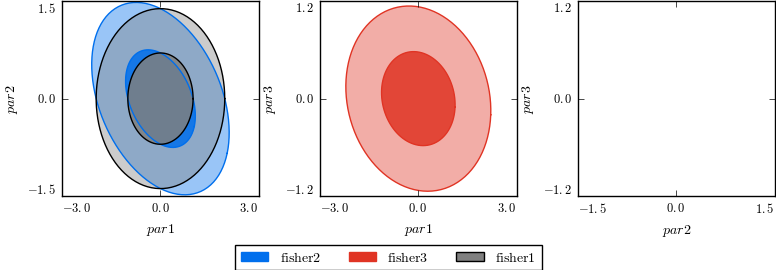

In [40]:
fisher_plotter.new_plot()
fisher_plotter.plot2D()
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 

Notice that the empty plot is signaling that there is no Fisher matrix with both par2 and par3.

As before we can select parameters by passing parameters couples:

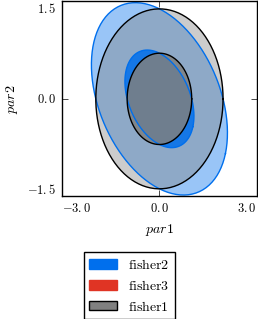

In [41]:
fisher_plotter.new_plot()
fisher_plotter.plot2D([['par1','par2']],legend_ncol=1)
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 

Notice that we changed a setting on the flight. Other settings can be changed on the flight as well and will hold only for the selected plot.

### Triangular plot:

Precisely in the same way we can do triangular plots. Beware that calling plot_tri without arguments will result in a full triangular plot and this might take a while in real applications.

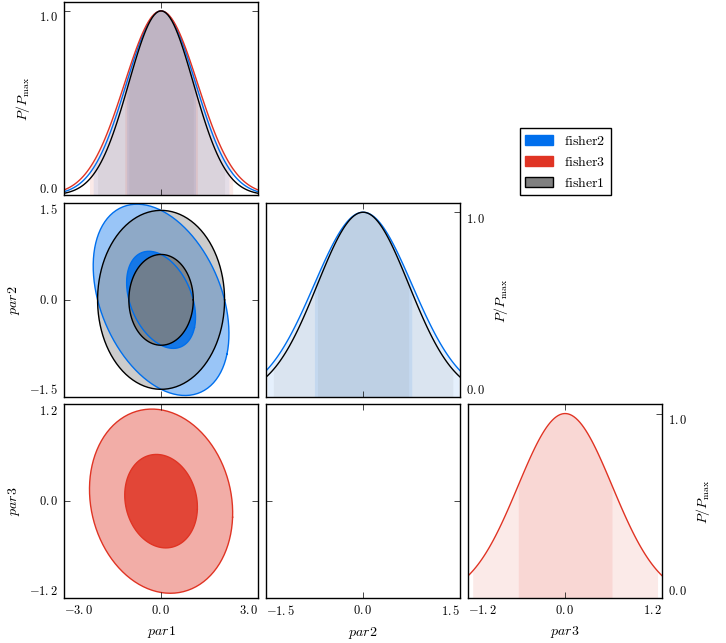

In [42]:
fisher_plotter.new_plot()
fisher_plotter.plot_tri(legend_ncol=1)
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 

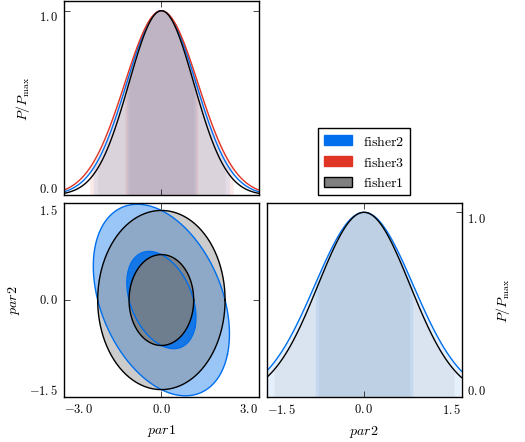

In [43]:
fisher_plotter.new_plot()
fisher_plotter.plot_tri(['par1','par2'],legend_ncol=1)
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 

## A realistic example:

So far we have seen just simple, unrealistic, examples. Now we turn to a realistic situation. 
We shall now take a couple of Fisher matrices that were produced with the CosmicFish code and show how to perform simple operations.

The CosmicFish python library comes with a set of applications that will facilitate every of these operations for real situations. Instead of doing a lot of Python code check their [documentation](cosmicfish_pylib_apps.html).

We start by importing the Fisher matrices. This can be done in two ways. By letting CosmicFish_FisherAnalysis search a set of paths or point him directly to the Fisher matrices. Here we go showing both:

In [47]:
files = './documentation/python/fisher_test/'

In [48]:
fisher_list = fpa.CosmicFish_FisherAnalysis(fisher_path=files)

Imported as a Fisher matrix: ./documentation/python/fisher_test/Planck_Pre_Launch_fisher_matrix_cls.dat


In [49]:
fisher_list = fpa.CosmicFish_FisherAnalysis(fisher_path=[files+'Planck_Pre_Launch_fisher_matrix_cls.dat' ])

Imported as a Fisher matrix: ./documentation/python/fisher_test/Planck_Pre_Launch_fisher_matrix_cls.dat


Now we might want the bounds on some parameters and we can simply do:

In [50]:
names    = fisher_list.get_fisher_matrix('Planck_Pre_Launch_fisher_matrix_cls')[0].get_param_names()
fiducial = fisher_list.get_fisher_matrix('Planck_Pre_Launch_fisher_matrix_cls')[0].get_param_fiducial()
bounds68 = fisher_list.get_fisher_matrix('Planck_Pre_Launch_fisher_matrix_cls')[0].get_confidence_bounds()

In this format the results will contain a lot of useless digits. We use some utility to get rid of them:

In [51]:
bounds68 = fu.v_nice_number(bounds68)
fiducial = [ fu.significant_digits((i,j)) for i,j  in zip(fiducial,bounds68) ]

And print them in a nicely formatted table:

In [52]:
fu.print_table( [names,fiducial, bounds68] )


| omegabh2  | 0.0226 | 0.0003 |
| omegach2  |  0.112 |  0.002 |
| omeganuh2 |  0.001 |  0.002 |
| h         |    0.7 |   0.02 |
| yhe       |   0.24 |   0.02 |
| logA      |  3.045 |  0.009 |
| ns        |   0.96 |  0.009 |
| nrun      |    0.0 |  0.008 |
| nt        |    0.0 |   0.07 |
| r         |    1.0 |    0.2 |
| tau       |   0.09 |  0.005 |
| alpha_SN  |    0.0 |    5.0 |
| beta_SN   |    0.0 |    5.0 |
| M0_SN     |    0.0 |    5.0 |



And now we do some plot:

In [53]:
fisher_plotter = fp.CosmicFishPlotter(fishers=fisher_list)

In [54]:
fisher_plotter.new_plot()

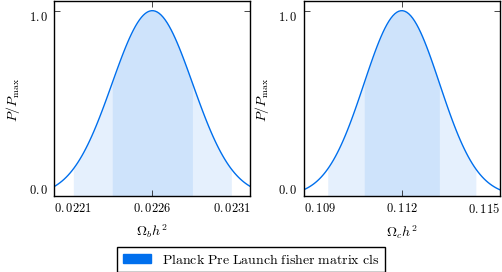

In [55]:
fisher_plotter.new_plot()
fisher_plotter.plot1D(['omegabh2','omegach2'])
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 

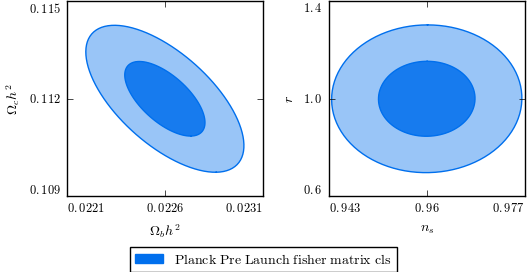

In [56]:
fisher_plotter.new_plot()
fisher_plotter.plot2D([['omegabh2','omegach2'],['ns','r']])
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 

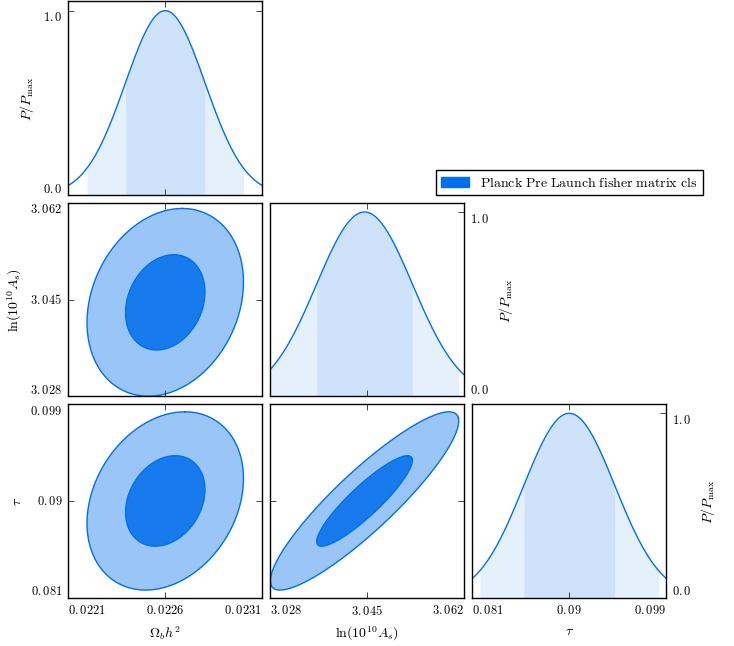

In [57]:
fisher_plotter.new_plot()
fisher_plotter.plot_tri(['omegabh2','logA','tau'])
fisher_plotter.export('test.png', dpi=100)
IPython.display.Image(filename='test.png',unconfined=True) 